# **MINOR PROJECT AI CLUB IGDTUW**

-Suhani Jain

Enrol.No.-06001032021

# **LOAN DEFAULT PREDICTION**

# **PROJECT AIM:**

This is a very useful project which can be used in banks for keeping the record of people,their account balance,annual income,check whether people have paid EMI or not and many more uses it has.Through this project we can easily interpret and visualise the data.

# **DATA ANALYSIS**

In [16]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [17]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/minor project'

In [18]:
%cd /content/drive/MyDrive/minor project

/content/drive/MyDrive/minor project


In [19]:
!kaggle datasets download -d kmldas/loan-default-prediction

loan-default-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [20]:
!unzip \*.zip && rm*  .zip

Archive:  loan-default-prediction.zip
replace Default_Fin.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Default_Fin.csv         
/bin/bash: rm*: command not found


In [21]:
df=pd.read_csv('/content/drive/MyDrive/minor project/Default_Fin.csv')

In [22]:
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [23]:
df.shape

(10000, 5)

In [24]:
df.columns

Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')

**QUESTION 1:**What is the number of people who will be given a grace period of exactly 15 days?


In [25]:
count=(df[(df['Annual Salary']>100000) & (df['Bank Balance']>5000)])
print('Number of people are:',count['Index'].count())

Number of people are: 7837


**ANSWER 1:**There are 7837 people who will get a grace period of 15 days.

In this question we have simply applied the 'if' condition to collect the data of people having annual salary greater than 100000 and bank balance greater than 5000 and applied 'count' to count no. of such people.

**QUESTION 2:**Find the maximum fine that can be levied by the bank in the period of 15 days.

In [26]:
search1=(df[((df['Annual Salary']<100000) | (df['Bank Balance']<5000)) & (df['Employed']==1)])
present_balance=search1['Bank Balance'].max()
fine=0
for j in range(0,15):
  fine=fine+present_balance*2.5/100
  present_balance=present_balance*(100-2.5)/100
print(fine)

1993.968504989993


**ANSWER 2:**The maximum fine levied by bank is Rs.1993.968
1. In this case we searched for employed people whose annual salary is less than 100000 or bank balance less than 5000.

2. In order to get maximum fine we searched for the people with maximum bank balance.

3. Now we have applied the for loop to calculate the total fine OF 2.5%


**QUESTION 3:**Assuming that all the people falling into the category of defaulters have not paid their EMI in the grace period,what is the total amount being generated by the bank as fine?


In [28]:
defaulte=df[((df['Bank Balance']>5000) & (df['Annual Salary']>100000)) & (df['Defaulted?']==1)]
fine1=(defaulte['Bank Balance']*0.025).sum() #first day fine

#assuming no of days=10 for charging fine as it is not mentioned in question
curr_bal=defaulte['Bank Balance']
fine=0
j=0
while(j<10):
  fine=fine+curr_bal*2.5/100
  curr_bal=curr_bal-fine
  j=j+1
print(fine.sum())

1107701.5377534109


**ANSWER 3:**Total fine for 10 days is Rs.1107701.5377

1. In this case we have applied the above condition to calculate the fine for 1 day.
2. Then we have applied while loop to calculate fine for 10 days.In this case we have to subtract the fine from current bank balance each day.
3. Print sum of fine of 10 days. 

**QUESTION 4:**Ploat a graph to show the difference in bank balance of the people who are not eligible for a grace period,and those who are.

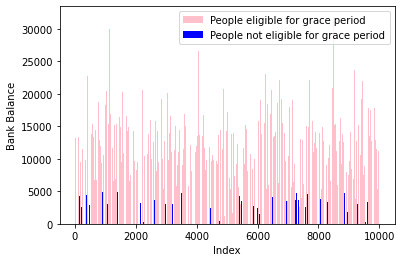

In [29]:
import matplotlib.pyplot as plt
with_grace=df[((df['Annual Salary']>100000) & (df['Bank Balance']>5000)) | (df['Employed']==0)]
without_grace=df[((df['Annual Salary']<100000) | (df['Bank Balance']<5000)) & (df['Employed']==1)]
plt.bar(with_grace['Index'],with_grace['Bank Balance'],color="pink",label="People eligible for grace period")
plt.bar(without_grace['Index'],without_grace['Bank Balance'],color="blue",label="People not eligible for grace period")
plt.xlabel("Index")
plt.ylabel("Bank Balance")
plt.legend()
plt.show()


**ANALYSIS**

1.Here the Bar graph is the most suitable graph to visualise the difference between bank balance of people.This graph is easy to understand and visualise.

2.This graph shows the difference between bank balance of the people who are eligible and not eligible for grace period.

**QUESTION 5:**Find the difference in the median of the bank balance of those people who are eligible for grace period and the original value.

In [30]:
import statistics as stat
import math
median=stat.median(with_grace['Bank Balance'])
with_grace['Difference']=abs(median-with_grace['Bank Balance'])
with_grace.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?,Difference
0,1,1,8754.36,532339.56,0,2477.58
1,2,0,9806.16,145273.56,0,1425.78
2,3,1,12882.60,381205.68,0,1650.66
3,4,1,6351.00,428453.88,0,4880.94
4,5,1,9427.92,461562.00,0,1804.02


**ANALYSIS**

The differance between the median of the bank balance of people who are eligible for grace period and the original value is shown in the new column "Differance"

**QUESTION 6.**Use a suitable graph to show the changes in the annual income of those people who are eligible for grace period and those who are not.

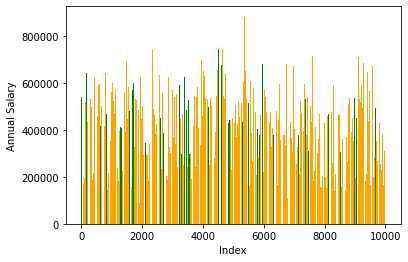

In [31]:
plt.bar(with_grace['Index'],with_grace['Annual Salary'],color='orange',label='People eligible for grace period')
plt.bar(without_grace['Index'],without_grace['Annual Salary'],color='green',label='People not eligible for grace period')
plt.xlabel('Index')
plt.ylabel('Annual Salary')
plt.legend
plt.show()

**ANALYSIS**

1.Here the Bar graph is the most suitable graph to visualise the difference between the annual income of people.This graph is easy to understand and visualise.

2.This graph shows the difference between bank annual income of the people who are eligible and not eligible for grace period.